# An Analysis of SAT Scores in High Schools of New York City 

# Table of Contents

* [Introduction](#Introduction)
* [Reading the Data](#ReadingtheData)
* [Cleaning the Datasets](#CleaningtheDatasets)
* [Condensing the Datasets](#CondensingtheDatasets)
* [Combining the Datasets](#CombiningtheDatasets)
* [Finding Correlations](#FindingCorrelations)
* [SAT Scores and Number of AP Test Takers](#SATScoresandNumberofAPTestTakers)
* [SAT Scores and Number of Students](#SATScoresandNumberofStudents)
* [SAT Scores and Free and Reduced Priced Lunch](#SATScoresandFreeandReducedPricedLunch)
* [SAT Scores and English Language Learners](#SATScoresandEnglishLanguageLearners)
* [SAT Scores and Special Education](#SATScoresandSpecialEducation)
* [SAT Scores and Race](#SATScoresandRace)
* [SAT Scores and Gender](#SATScoresandGender)
* [SAT Scores and Survey Fields](#SATScoresandSurveyFields)
* [SAT Scores and Class size](#SATScoresandClasssize)
* [SAT Scores and Boroughs](#SATScoresandBoroughs)
* [Conclusion](#Conclusion)

# Introduction <a class="anchor" id="Introduction"></a>

In this project, our main focus is the SAT in New York City. The SAT is a standardized test widely used for college admissions in the United States. We will explore the effects of various characteristics, such as race, gender, class size, and more, on SAT results among high schools in New York City.

# Reading the Data <a class="anchor" id="ReadingtheData"></a>

We have a variety of files containing distinct sets of information. Below are the datasets you can click on to access the source:
- [`sat_results.csv`](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4/about_data): SAT scores for each high school in New York City
- [`ap_2010.csv`](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e/about_data): Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [`class_size.csv`](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3/about_data): Information on class size for each school
- [`demographics.csv`](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j/about_data): Demographic information for each school
- [`graduation.csv`](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a/about_data): The percentage of students who graduated, and other outcome information
- [`hs_directory.csv`](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2/about_data): A directory of high schools
- [`survey_all.txt`](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8/about_data): Data on surveys from all schools
- [`survey_d75.txt`](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8/about_data): Data on surveys from New York City district 75

## Reading `.csv` Files

In [1]:
import pandas as pd
import numpy
import re
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Saving the file names in a list
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# Creating a dictionary to store all datasets in
data = {}

# Filling the dictionary with our datasets 
# - key: the name of the dataset 
# - value: the content of the file
for f in data_files:
    d = pd.read_csv("data/{0}".format(f))
    data[f.replace(".csv", "")] = d

data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])

## Reading `.txt` Files

In [2]:
# The files are tab delimited and encoded with Windows-1252 encoding
all_survey = pd.read_csv("data/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("data/survey_d75.txt", delimiter="\t", encoding='windows-1252')

# Combining them into a single dataframe
survey = pd.concat([all_survey, d75_survey], axis=0)

# Cleaning the Datasets <a class="anchor" id="CleaningtheDatasets"></a>

The DBN or District Borough Number is the combination of the District Number, the letter code for the borough, and the number of the school. Every school in NYC Public Schools (NYCPS) has a District Borough Number. Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.

## Cleaning the survey Datasets

In [3]:
# checking survey columns
survey.columns

Index(['dbn', 'bn', 'schoolname', 'd75', 'studentssurveyed', 'highschool',
       'schooltype', 'rr_s', 'rr_t', 'rr_p',
       ...
       's_q14_2', 's_q14_3', 's_q14_4', 's_q14_5', 's_q14_6', 's_q14_7',
       's_q14_8', 's_q14_9', 's_q14_10', 's_q14_11'],
      dtype='object', length=2773)

In [4]:
# The survey data has a dbn column that we want to convert to uppercase (DBN)
survey = survey.assign(DBN=survey["dbn"])

In [5]:
# checking the number of survey rows and columns
survey.shape

(1702, 2774)

In [6]:
# We have to filter the data to remove the unnecessary ones (There are over 2000 columns!)
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# Keeping the columns above and remove the others
survey = survey.loc[:,survey_fields]

# checking the number of survey rows and columns
survey.shape

(1702, 23)

In [7]:
# Adding 'survey' dataset into our dictionary 
data["survey"] = survey

# Checking the 'data' dictionary  
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [8]:
# Checking if the values in 'DBN' column are unique:
data["survey"]["DBN"].is_unique  

True

## Cleaning `class_size` Dataset

In [9]:
data["class_size"].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

As observed, there is no `DBN` column. We can create a 'DBN' column by combining the contents of `CSD` and `SCHOOL CODE` together.

In [10]:
# Examples of DBN in sat_score dataset:
data['sat_results']['DBN']

0      01M292
1      01M448
2      01M450
3      01M458
4      01M509
        ...  
473    75X012
474    75X754
475    79M645
476    79Q950
477    79X490
Name: DBN, Length: 478, dtype: object

In [11]:
data["class_size"][['CSD','SCHOOL CODE']]
# CSD + SCHOOL CODE = DBN
# We have to change one-digit CSDs to two-digit CSDs by padding them with a leading zero: 1 -> 01 or 2 -> 02.
# For example for the first row below: (1 -> 01) then (01 + M015) = "01M015" 

CSD SCHOOL CODE
0        1        M015
1        1        M015
2        1        M015
3        1        M015
4        1        M015
...    ...         ...
27606   32        K564
27607   32        K564
27608   32        K564
27609   32        K564
27610   32        K564

[27611 rows x 2 columns]

In [12]:
# A function for adding a leading zero to CSD as necessary:
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation

# Creating the "padded_csd" column using the above function:
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# Creating the 'DBN' column("padded_csd" + "SCHOOL CODE"):
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [13]:
# Checking the 'DBN' column
data["class_size"][['CSD','SCHOOL CODE','DBN']]

CSD SCHOOL CODE     DBN
0        1        M015  01M015
1        1        M015  01M015
2        1        M015  01M015
3        1        M015  01M015
4        1        M015  01M015
...    ...         ...     ...
27606   32        K564  32K564
27607   32        K564  32K564
27608   32        K564  32K564
27609   32        K564  32K564
27610   32        K564  32K564

[27611 rows x 3 columns]

## Cleaning the `sat_result` Dataset

In [14]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


The SAT average score for each school is critical for our analysis. As you can see above, we have three SAT score categories recorded in our dataset: 'Critical Reading,' 'Math,' and 'Writing.' We want to calculate the mean of these three columns and save the result in a new column called `sat_score`. Before doing that, we need to convert the values to numeric format.

In [15]:
# Converting to numeric format:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Calculating the mean of values and storing them in 'sat_score' column
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

data['sat_results']['sat_score'].max()

2096.0

In [16]:
# Converting to numeric format:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Calculating the mean of values and storing them in 'sat_score' column
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [17]:
# Checking if the values in 'DBN' column are unique:
data["sat_results"]["DBN"].is_unique  

True

## Cleaning the `hs_directory` Dataset

### Adding DBN columns to `hs_directory`

In [18]:
data["hs_directory"].columns

Index(['dbn', 'school_name', 'boro', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'zip', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'priority05', 

In [19]:
# The hs_directory has a dbn column that we want to convert to uppercase (DBN)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [20]:
data["hs_directory"].columns

Index(['dbn', 'school_name', 'boro', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'zip', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'priority05', 

### Adding latitude and Longitude Columns to the `hs_directory` dataset

In [21]:
data["hs_directory"]["Location 1"][0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

In [22]:
data["hs_directory"]["Location 1"][1]

'1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)'

In the Location_1 column, we have the latitude and longitude of each school. We can use regular expressions to extract these values and then store them in their respective columns called `lat` and `lon`:

In [23]:
# Regular expression:  
#'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)' -> 40.67029890700047

def find_lat(loc):
    coords = re.findall(r"\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# Regular expression:  
#'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)' -> -73.96164787599963

def find_lon(loc):
    coords = re.findall(r"\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

# Using the functions above and storing the values in respective columns:
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# Converting the values to numeric format:
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [24]:
data["hs_directory"][["Location 1","lat","lon"]].head(3)

Location 1        lat        lon
0  883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...  40.670299 -73.961648
1  1110 Boston Road\nBronx, NY 10456\n(40.8276026...  40.827603 -73.904475
2  1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...  40.842414 -73.916162

In [25]:
# Checking if the values in 'DBN' column are unique:
data["hs_directory"]["DBN"].is_unique  

True

## Cleaning the `ap_2010` Dataset

In [26]:
data["ap_2010"].head()

DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s

In [27]:
data["ap_2010"]['DBN'].is_unique

False

Let's find the rows that caused the value of the `DBN` column not to be unique:

In [28]:
data["ap_2010"]['DBN'].value_counts()

DBN
04M610    2
01M448    1
19K507    1
17K528    1
17K537    1
         ..
09X329    1
09X365    1
09X412    1
09X414    1
32K556    1
Name: count, Length: 257, dtype: int64

In [29]:
data["ap_2010"][data["ap_2010"]['DBN']=='04M610']

DBN                                         SchoolName AP Test Takers   \
51  04M610  THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...              41   
52  04M610                       YOUNG WOMEN'S LEADERSHIP SCH               s   

   Total Exams Taken Number of Exams with scores 3 4 or 5  
51                55                                   29  
52                 s                                    s

In [30]:
# Deleting the the row  to make the values of 'DBN' unique
data["ap_2010"] = data["ap_2010"][data["ap_2010"]['SchoolName']!="YOUNG WOMEN'S LEADERSHIP SCH"]

In [31]:
data["ap_2010"]['DBN'].is_unique

True

In [32]:
# Checking data types
data["ap_2010"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DBN                                   257 non-null    object
 1   SchoolName                            257 non-null    object
 2   AP Test Takers                        257 non-null    object
 3   Total Exams Taken                     257 non-null    object
 4   Number of Exams with scores 3 4 or 5  257 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


Let's convert `AP Test Takers `, `Total Exams Taken`, and `Number of Exams with scores 3 4 or 5` to numeric values:

In [33]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

In [34]:
data["ap_2010"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   257 non-null    object 
 1   SchoolName                            257 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 12.0+ KB


In [35]:
data["ap_2010"].head()

DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN

# Condensing the Datasets <a class="anchor" id="CondensingtheDatasets"></a>

## Condensing `class_size` Dataset

In [36]:
data["class_size"].head(2)

CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  \
0                   19.0         ATS                             NaN   
1                   21.0         ATS                             NaN   

  padded_csd     DBN  
0         01  01M015  
1         01  01M015

In [37]:
data["class_size"]['GRADE '].value_counts()

GRADE 
09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: count, dtype: int64

As we mentioned, our area of analysis is high school, so we will only keep grades 9 through 12.

In [38]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]

Now, let's take a look at `PROGRAM TYPE` column:

In [39]:
class_size["PROGRAM TYPE"].value_counts()

PROGRAM TYPE
GEN ED     6513
CTT        2953
SPEC ED    1178
Name: count, dtype: int64

- `GEN ED`: A gen ed is just what it sounds like, it's a generalized course of study in a certain subject, think classes like: English I and II. Basic college math courses. History. Science (including social sciences)
- `CTT`: Community Teacher Training 
- `SPEC ED`: Special education is the practice of educating students in a way that accommodates their individual differences, disabilities, and special needs.

We only need to keep rows with `GEN ED`:

In [40]:
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

Each school probably has more than one class. Therefore, we likely have many rows with the same 'DBN,' which is not what we want when we combine the datasets using 'DBN' as a unique key. We can group the classes of each school by 'DBN' and then convert them all into one row using the mean() method.

In [41]:
# Grouping the classes of each school and calculating its mean:
class_size = class_size.groupby("DBN").mean(numeric_only=True)
class_size.head()

CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
DBN                                                                  
01M292  1.0                            88.0000            4.000000   
01M332  1.0                            46.0000            2.000000   
01M378  1.0                            33.0000            1.000000   
01M448  1.0                           105.6875            4.750000   
01M450  1.0                            57.6000            2.733333   

        AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
DBN                                                                         
01M292           22.564286                   18.50              26.571429   
01M332           22.000000                   21.00              23.500000   
01M378           33.000000                   33.00              33.000000   
01M448           22.231250                   18.25              27.062500   
01M450           21.200000                   19.40              22.866667   

        SCHOOLWIDE PUPIL-TEACHER RATIO  
DBN                                     
01M292                             NaN  
01M332                             NaN  
01M378                             NaN  
01M448                             NaN  
01M450                             NaN

We do not want DBN as the index, but rather as a separate column to be used as a unique key. Let's reset the indexes:

In [42]:
class_size.reset_index(inplace=True)
class_size.head()

DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292  1.0                            88.0000            4.000000   
1  01M332  1.0                            46.0000            2.000000   
2  01M378  1.0                            33.0000            1.000000   
3  01M448  1.0                           105.6875            4.750000   
4  01M450  1.0                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN

In [43]:
# Saving the modified dataset into the 'data' dictionary again:
data["class_size"] = class_size

In [44]:
# Checking if the values in 'DBN' column are unique:
data["class_size"]["DBN"].is_unique  

True

## Condensing `demographics` Dataset

In [45]:
data["demographics"].head()

DBN                       Name  schoolyear fl_percent  frl_percent  \
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006       89.4          NaN   
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007       89.4          NaN   
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008       89.4          NaN   
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009       89.4          NaN   
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010                    96.5   

   total_enrollment prek   k grade1 grade2  ... black_num black_per  \
0               281   15  36     40     33  ...        74      26.3   
1               243   15  29     39     38  ...        68      28.0   
2               261   18  43     39     36  ...        77      29.5   
3               252   17  37     44     32  ...        75      29.8   
4               208   16  40     28     32  ...        67      32.2   

  hispanic_num hispanic_per white_num white_per male_num male_per female_num  \
0          189         67.3         5       1.8    158.0     56.2      123.0   
1          153         63.0         4       1.6    140.0     57.6      103.0   
2          157         60.2         7       2.7    143.0     54.8      118.0   
3          149         59.1         7       2.8    149.0     59.1      103.0   
4          118         56.7         6       2.9    124.0     59.6       84.0   

  female_per  
0       43.8  
1       42.4  
2       45.2  
3       40.9  
4       40.4  

[5 rows x 38 columns]

Again, we have many rows with the same `DBN` because it contains data from different years:

In [46]:
data["demographics"]['schoolyear'].value_counts()

schoolyear
20112012    1509
20102011    1498
20092010    1475
20082009    1441
20072008    1410
20062007    1386
20052006    1356
Name: count, dtype: int64

We will only keep the data from the most recent years:

In [47]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [48]:
# Checking if the values in 'DBN' column are unique:
data["demographics"]["DBN"].is_unique  

True

## Condensing `graduation` Dataset

In [49]:
# Checking if the values in 'DBN' column are unique:
data["graduation"]["DBN"].is_unique  

False

In [50]:
data["graduation"].head()

Demographic     DBN                            School Name    Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2005   
3  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2006   
4  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL  2006 Aug   

   Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
0             5               s                         s                 s   
1            55              37                     67.3%                17   
2            64              43                     67.2%                27   
3            78              43                     55.1%                36   
4            78              44                     56.4%                37   

  Total Regents - % of cohort Total Regents - % of grads  ...  \
0                           s                          s  ...   
1                       30.9%                      45.9%  ...   
2                       42.2%                      62.8%  ...   
3                       46.2%                      83.7%  ...   
4                       47.4%                      84.1%  ...   

  Regents w/o Advanced - n Regents w/o Advanced - % of cohort  \
0                        s                                  s   
1                       17                              30.9%   
2                       27                              42.2%   
3                       36                              46.2%   
4                       37                              47.4%   

  Regents w/o Advanced - % of grads Local - n Local - % of cohort  \
0                                 s         s                   s   
1                             45.9%        20               36.4%   
2                             62.8%        16                 25%   
3                             83.7%         7                  9%   
4                             84.1%         7                  9%   

    Local - % of grads Still Enrolled - n Still Enrolled - % of cohort  \
0                    s                  s                            s   
1                54.1%                 15                        27.3%   
2  37.200000000000003%                  9                        14.1%   
3                16.3%                 16                        20.5%   
4                15.9%                 15                        19.2%   

  Dropped Out - n Dropped Out - % of cohort  
0               s                         s  
1               3                      5.5%  
2               9                     14.1%  
3              11                     14.1%  
4              11                     14.1%  

[5 rows x 23 columns]

The `Demographic` and `Cohort` columns are the reasons why the `DBN` is not unique. Let's examine the contents of these columns.:

In [51]:
data["graduation"]['Demographic'].value_counts()

Demographic
Total Cohort                   2493
English Proficient Students    2471
Special Education Students     2471
General Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: count, dtype: int64

In [52]:
# Keeping only the rows with 'Total Cohort' in their 'Demographic' column:
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [53]:
data["graduation"]['Cohort'].value_counts()

Cohort
2006        405
2006 Aug    405
2005        390
2004        367
2003        346
2002        318
2001        262
Name: count, dtype: int64

In [54]:
# Keeping only the rows with '2006' in their 'Cohort' column:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]

In [55]:
# Checking if the values in 'DBN' column are unique:
data["graduation"]["DBN"].is_unique  

True

# Combining the Datasets <a class="anchor" id="CombiningtheDatasets"></a>

First, we are going to check the uniqueness of the values in the DBN column across all of our datasets:

In [56]:
for dt in data:
    print('{}:'.format(dt))
    print(data[dt]['DBN'].is_unique)

ap_2010:
True
class_size:
True
demographics:
True
graduation:
True
hs_directory:
True
sat_results:
True
survey:
True


In [57]:
# Start by selecting the "sat_results" dataset from the data dictionary and saving it into a variable called 'combined',   
# to which we will add other datasets one by one.
combined = data["sat_results"]  

To combine `sat_results` (`combined`) and `ap_2010`, by using a left join (how=`left`), it retains all rows from the `sat_results` dataset while adding corresponding values from the `ap_2010` dataset wherever there is a matching `DBN`. In cases where there is no match for some rows in `sat_results`, the resulting DataFrame will have `NaN` (null) values for the columns coming from `ap_2010`:

In [58]:
# Merge "sat_results" (combined) with "ap_2010" dataset on the 'DBN' column:  
combined = combined.merge(data["ap_2010"], on="DBN", how="left")  

# checking the result:
combined.head()

DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0                   359.0     1174.0   
4                433.0                   384.0     1207.0   

                     SchoolName  AP Test Takers   Total Exams Taken  \
0                           NaN              NaN                NaN   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
2        EAST SIDE COMMUNITY HS             19.0               21.0   
3                           NaN              NaN                NaN   
4                           NaN              NaN                NaN   

   Number of Exams with scores 3 4 or 5  
0                                   NaN  
1                                  10.0  
2                                   NaN  
3                                   NaN  
4                                   NaN

Let's do the same to add `graduation` dataset to `combined`:

In [59]:
# Merge the combined data with "graduation" dataset on the 'DBN' column:  
combined = combined.merge(data["graduation"], on="DBN", how="left") 

# checking the result:
combined.head()

DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0                   359.0     1174.0   
4                433.0                   384.0     1207.0   

                     SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                           NaN              NaN                NaN  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0  ...   
2        EAST SIDE COMMUNITY HS             19.0               21.0  ...   
3                           NaN              NaN                NaN  ...   
4                           NaN              NaN                NaN  ...   

   Regents w/o Advanced - n Regents w/o Advanced - % of cohort  \
0                        36                              46.2%   
1                        34                              27.4%   
2                        67                74.400000000000006%   
3                       NaN                                NaN   
4                        23                              27.4%   

  Regents w/o Advanced - % of grads Local - n  Local - % of cohort  \
0                             83.7%         7                   9%   
1                             64.2%        11                 8.9%   
2                             95.7%         3                 3.3%   
3                               NaN       NaN                  NaN   
4                             48.9%         7   8.300000000000001%   

  Local - % of grads Still Enrolled - n Still Enrolled - % of cohort  \
0              16.3%                 16                        20.5%   
1              20.8%                 46                        37.1%   
2               4.3%                 15                        16.7%   
3                NaN                NaN                          NaN   
4              14.9%                 25                        29.8%   

  Dropped Out - n Dropped Out - % of cohort  
0              11                     14.1%  
1              20       16.100000000000001%  
2               5                      5.6%  
3             NaN                       NaN  
4               5                        6%  

[5 rows x 33 columns]

For the `class_size`, `demographics`, `survey`, and `hs_directory` datasets, we will use `how="inner"` in the merge operation because we only want to keep the rows where there is a match on the `DBN` column between the datasets. While this approach may result in the loss of some data, it helps us avoid retaining a significant number of `null` values in the final combined dataset:

In [60]:
# List of additional datasets to merge with the combined data  
to_merge = ["class_size", "demographics", "survey", "hs_directory"]  

# Iterate through each dataset in the to_merge list  
for m in to_merge:  
    # Perform an inner merge, ensuring only matching rows are included  
    combined = combined.merge(data[m], on="DBN", how="inner")  

In [61]:
# Fill any remaining NaN values in numeric columns with the mean of those columns  
combined = combined.fillna(combined.mean(numeric_only=True)) 

# Finding Correlations <a class="anchor" id="FindingCorrelations"></a>

<Axes: >

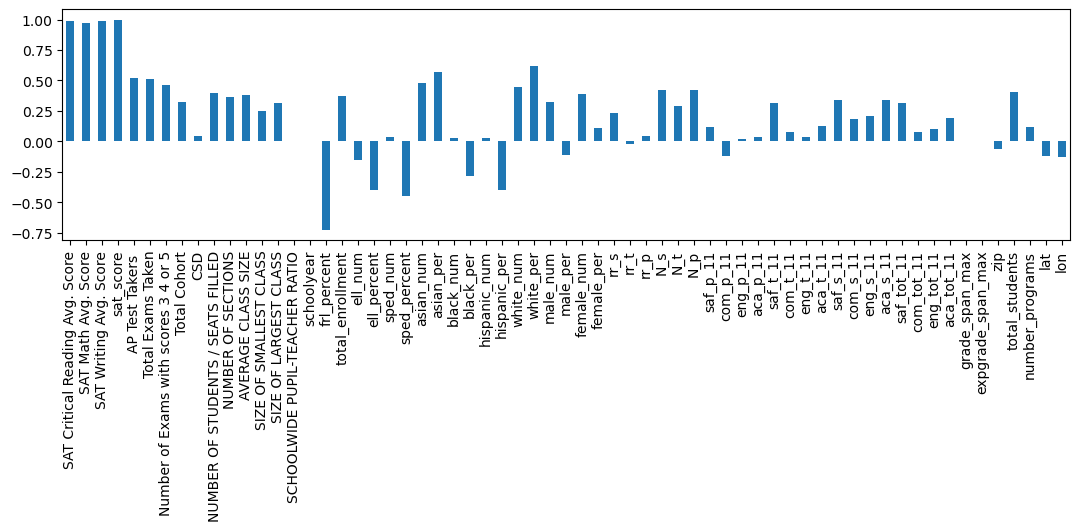

In [62]:
numeric_combined = combined.select_dtypes(include=['number'])  

correlations = numeric_combined.corr()
correlations = correlations["sat_score"]
plt.figure(figsize=(13,3))  
correlations.plot.bar()

In [63]:
'asian_per''black_per''hispanic_per''white_per''male_per''female_per'

'asian_perblack_perhispanic_perwhite_permale_perfemale_per'

# SAT Scores and Number of AP Test Takers  <a class="anchor" id="SATScoresandNumberofAPTestTakers"></a>

In [64]:
numeric_combined.corr()['sat_score']['AP Test Takers ']

0.523382893112365

<Axes: xlabel='AP Test Takers ', ylabel='sat_score'>

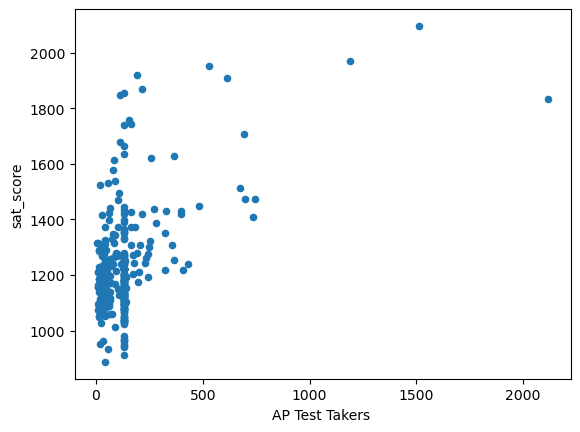

In [65]:
combined.plot.scatter(x='AP Test Takers ', y = 'sat_score')

The scatter plot shows the relationship between the number of AP test takers (horizontal axis) and SAT scores (vertical axis). The plot suggests that as SAT scores increase, the number of AP test takers also tends to increase, although this trend is not very strong.

# SAT Scores and Number of Students <a class="anchor" id="SATScoresandNumberofStudents"></a>

In [66]:
numeric_combined.corr()['sat_score']['NUMBER OF STUDENTS / SEATS FILLED']

0.395932245958105

<Axes: xlabel='NUMBER OF STUDENTS / SEATS FILLED', ylabel='sat_score'>

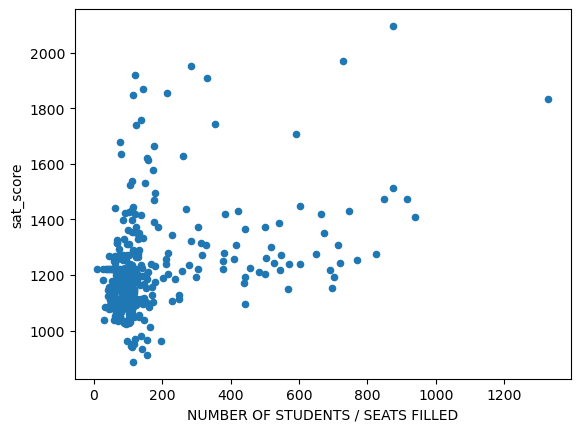

In [67]:
combined.plot.scatter(x='NUMBER OF STUDENTS / SEATS FILLED', y = 'sat_score')

The scatter plot shows the relationship between the number of students (horizontal axis) and SAT scores (vertical axis). Most data points are clustered towards the lower end of SAT scores and fewer students. As the number of students increases, SAT scores also show a slight increase but with considerable variation. There seems to be a potential correlation, though it’s not very strong.

# SAT Scores and Free and Reduced Priced Lunch <a class="anchor" id="SATScoresandFreeandReducedPricedLunch"></a>

FRL stands for Free and Reduced Priced Lunch. Children qualify, based upon parent or guardian financial status, to receive either free or reduced priced lunch through a federal governmental program.

In [68]:
numeric_combined.corr()['sat_score']['frl_percent']

-0.7227137103330455

<Axes: xlabel='frl_percent', ylabel='sat_score'>

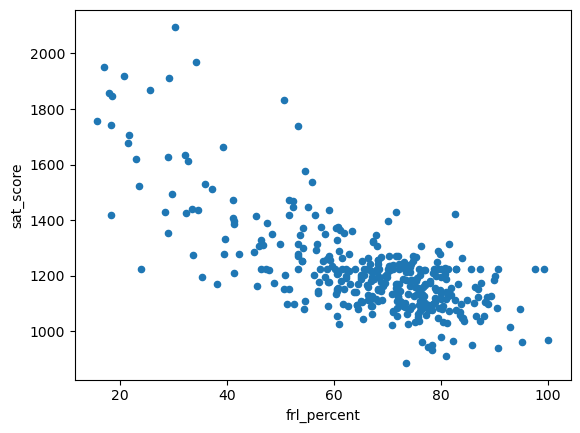

In [69]:
combined.plot.scatter(x='frl_percent', y = 'sat_score')

The scatter plot shows the relationship between SAT scores (vertical axis) and the percentage of students receiving free or reduced-price lunch (FRL) (horizontal axis). There is a noticeable trend where higher percentages of students receiving FRL correspond to lower SAT scores. This suggests that schools with a higher proportion of students from lower socioeconomic backgrounds tend to have lower average SAT scores.


# SAT Scores and English Language Learners <a class="anchor" id="SATScoresandEnglishLanguageLearners"></a>

English language learners, or ELLs, are students who are not yet able to communicate fluently or learn effectively in English.

In [70]:
numeric_combined.corr()['sat_score']['ell_percent']

-0.3982482246857633

<Axes: xlabel='ell_percent', ylabel='sat_score'>

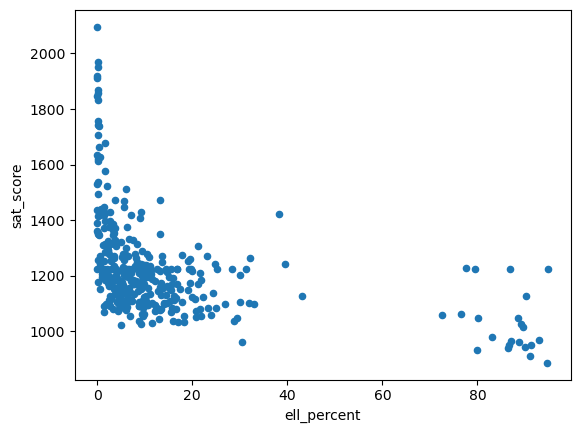

In [71]:
combined.plot.scatter(x='ell_percent', y = 'sat_score')

The scatter plot shows the relationship between SAT scores (vertical axis) and the percentage of English Language Learners (ELL) (horizontal axis). There is a noticeable trend where higher percentages of English Language Learners correspond to lower SAT scores. This suggests that schools with a higher proportion of ELL students tend to have lower average SAT scores. It is noteworthy that SAT scores above 1600 are exclusively observed in schools with almost no English Language Learners (ELL) students. The data highlights the educational challenges faced by ELL students. Schools with higher percentages of ELL students may need additional resources and support to help these students achieve higher academic performance. The trend may also reflect broader socioeconomic factors, as ELL students often come from diverse and sometimes economically disadvantaged backgrounds. Addressing these factors could help improve educational outcomes.

# SAT Scores and Special Education <a class="anchor" id="SATScoresandSpecialEducation"></a>

Special education (also known as SPED) is the practice of educating students in a way that accommodates their individual differences, disabilities, and special needs.

In [72]:
numeric_combined.corr()['sat_score']['sped_percent']

-0.4474134514731903

<Axes: xlabel='sped_percent', ylabel='sat_score'>

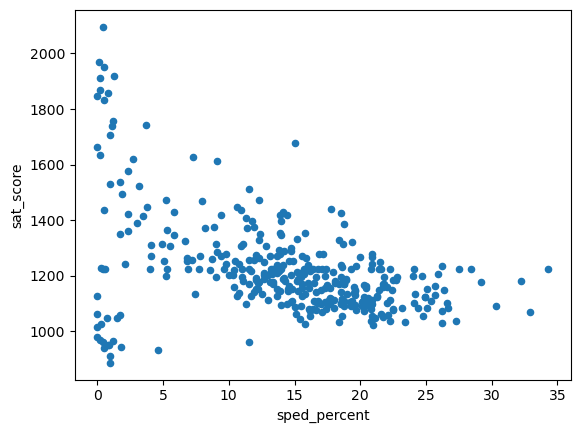

In [73]:
combined.plot.scatter(x='sped_percent', y = 'sat_score')

The scatter plot you provided shows the relationship between SAT scores (vertical axis) and the percentage of students in special education (sped_percent) (horizontal axis). There is a noticeable trend where higher percentages of students in special education correspond to lower SAT scores. This suggests that schools with a higher proportion of special education students tend to have lower average SAT scores. The data shows the challenges faced by special education students. Schools with more of these students might need extra help and resources to improve their academic performance.

# SAT Scores and Race <a class="anchor" id="SATScoresandRace"></a>

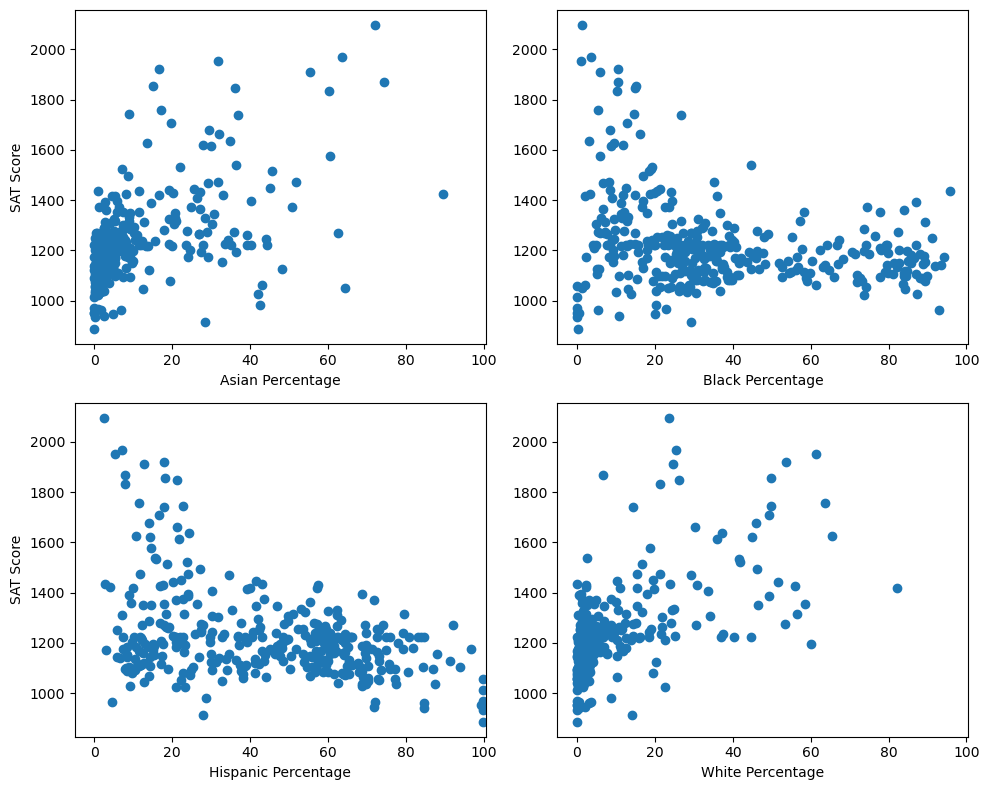

In [74]:
fig, ((ax_asian, ax_black), (ax_hispanic, ax_white)) = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plots with titles
ax_asian.scatter(x=combined['asian_per'], y=combined['sat_score'])
# ax_asian.set_title('Asian Percentage vs SAT Score')
ax_asian.set_xlabel('Asian Percentage')
ax_asian.set_ylabel('SAT Score')

ax_black.scatter(x=combined['black_per'], y=combined['sat_score'])
# ax_black.set_title('Black Percentage vs SAT Score')
ax_black.set_xlabel('Black Percentage')
# ax_black.set_ylabel('SAT Score')

ax_hispanic.scatter(x=combined['hispanic_per'], y=combined['sat_score'])
# ax_hispanic.set_title('Hispanic Percentage vs SAT Score')
ax_hispanic.set_xlabel('Hispanic Percentage')
ax_hispanic.set_ylabel('SAT Score')

ax_white.scatter(x=combined['white_per'], y=combined['sat_score'])
# ax_white.set_title('White Percentage vs SAT Score')
ax_white.set_xlabel('White Percentage')
# ax_white.set_ylabel('SAT Score')

ax_asian.set_xlim(-5,100.5)
ax_black.set_xlim(-5,100.5)
ax_hispanic.set_xlim(-5,100.5)
ax_white.set_xlim(-5,100.5)

# Adjust layout
plt.tight_layout()
plt.show()

In [75]:
race_list = ['asian_per','black_per','hispanic_per','white_per']
for x in race_list:
    correlation = numeric_combined.corr()['sat_score'][x]
    print('{}: {}'.format(x,correlation))

asian_per: 0.57162395934944
black_per: -0.2839301507780617
hispanic_per: -0.3984438202757635
white_per: 0.6219861895836547


- <h5>Asian Percentage vs SAT Score</h5>
The scatter plot shows a positive correlation between the percentage of Asian students and SAT scores. This suggests that schools with a higher percentage of Asian students tend to have higher SAT scores. This could be influenced by various factors such as cultural emphasis on education, access to resources, and community support.
- <h5>Black Percentage vs SAT Score</h5>
The scatter plot shows a negative correlation between the percentage of Black students and SAT scores. This indicates that schools with a higher percentage of Black students tend to have lower SAT scores. This could be due to systemic issues such as disparities in funding, access to quality education, and socio-economic challenges.
- <h5>Hispanic Percentage vs SAT Score</h5>
Similar to the Black percentage, the scatter plot shows a negative correlation between the percentage of Hispanic students and SAT scores. Factors could include language barriers, socio-economic status, and access to educational resources.
- <h5>White Percentage vs SAT Score</h5>
The scatter plot shows a positive correlation between the percentage of White students and SAT scores. Schools with a higher percentage of White students tend to have higher SAT scores. This could be influenced by factors such as socio-economic advantages, access to better-funded schools, and community support.

- Socio-Economic Factors: The correlations observed might be heavily influenced by socio-economic factors. Schools in wealthier areas often have more resources, better facilities, and more experienced teachers, which can contribute to higher SAT scores.- 
Systemic Inequities: The negative correlations for Black and Hispanic students highlight systemic inequities in education. Addressing these disparities requires comprehensive policy changes and targeted interventions to ensure all students have equal opportunities to succeed.

# SAT Scores and Gender <a class="anchor" id="SATScoresandGender"></a>

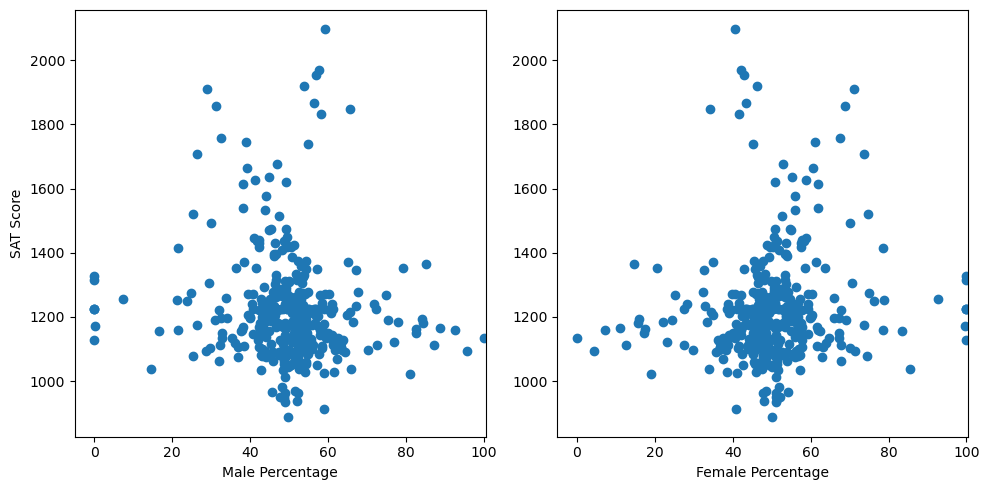

In [76]:
fig, (ax_male,ax_female) = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plots with titles
ax_male.scatter(x=combined['male_per'], y=combined['sat_score'])
# ax_male.set_title('Male Percentage vs SAT Score')
ax_male.set_xlabel('Male Percentage')
ax_male.set_ylabel('SAT Score')

ax_female.scatter(x=combined['female_per'], y=combined['sat_score'])
# ax_female.set_title('Female Percentage vs SAT Score')
ax_female.set_xlabel('Female Percentage')
# ax_female.set_ylabel('SAT Score')


ax_male.set_xlim(-5,100.5)
ax_female.set_xlim(-5,100.5)

# Adjust layout
plt.tight_layout()
plt.show()

In [77]:
gender_list = ['male_per','female_per']
for x in gender_list:
    correlation = numeric_combined.corr()['sat_score'][x]
    print('{}: {}'.format(x,correlation))

male_per: -0.10834338597948717
female_per: 0.1083894515831484


The data points on both plots are scattered without a clear trend. However, there are very weak positive and negative correlations between the SAT score and the female and male percentages, respectively.

Some other interesting observations can be made:
- All single-sex schools have an average SAT score between 1100 and 1400 (below average).
- Both SAT scores above 1600 (high scores) and SAT scores below 1000 (very low scores) belong to mixed schools with relatively balanced populations.
- All very low SAT scores also belong to mixed schools with balanced populations.

# SAT Scores and Survey Fields <a class="anchor" id="SATScoresandSurveyFields"></a>

In [78]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

Text(0, 0.5, 'Correlation with SAT Scores')

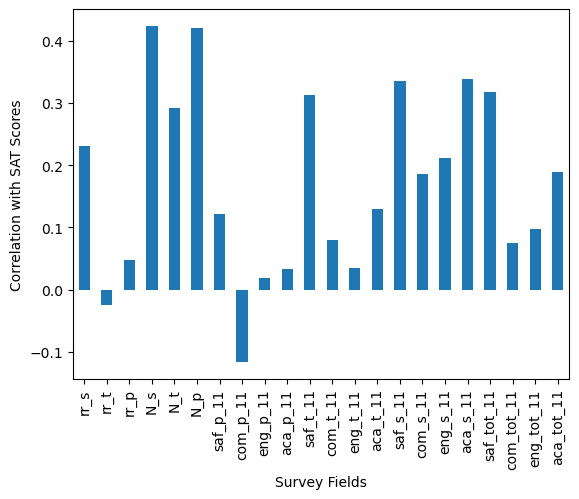

In [79]:
numeric_combined.corr()['sat_score'][survey_fields].plot.bar()

plt.xlabel('Survey Fields')
plt.ylabel('Correlation with SAT Scores')

# chart abbreviations:
# rr_ : response rate
# N_ : number of respondents
# s : student
# t : teacher
# p : parent
# saf_ : safety and respect score
# com_ : communication score
# eng_ : engagement score
# aca_ : academic expectations score

Some fields show a relatively stronger correlation with SAT scores:

<b>Number of Respondents:</b> 
<br>A higher number of respondents may indicate greater engagement and involvement from the school community. This engagement can lead to better support systems for students, ultimately resulting in higher SAT scores. Additionally, a larger number of respondents provides a more accurate and representative picture of the school’s environment and needs, which can help implement effective strategies for improving academic performance. Schools with higher participation rates are also likely to have better resources and infrastructure, further contributing to higher SAT scores.

<b>Safety and Respect Score Based on Teacher and Student Responses:</b>
<br>A higher safety and respect score suggests a positive and supportive learning environment. Students who feel safe and respected are more likely to focus on their studies and perform better academically. Additionally, A safe and respectful environment reduces stress and anxiety among students, allowing them to concentrate better and achieve higher SAT scores. Moreover, Good safety and respect scores often reflect strong, positive relationships between teachers and students, which can enhance learning and academic performance.

<b>Academic Expectation Based on Student Responses:</b> 
<br>Schools with high academic expectations set high standards for their students. This encourages students to strive for excellence and achieve higher SAT scores. High academic expectations often come with a supportive environment that provides the necessary resources and guidance for students to meet those expectations.

# SAT Scores and Class size <a class="anchor" id="SATScoresandClasssize"></a>

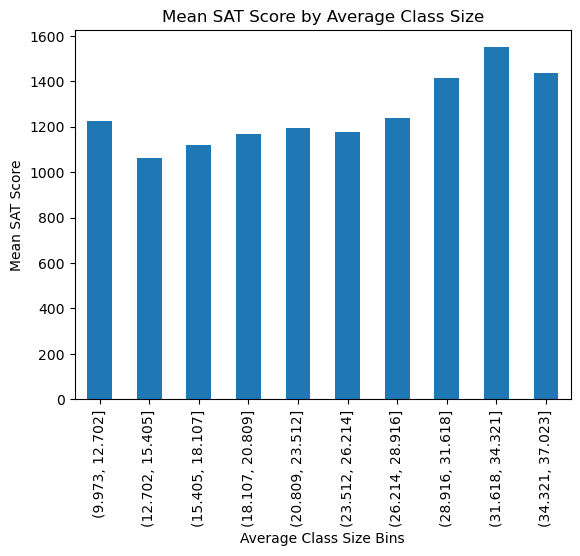

In [80]:
# combined.groupby('AVERAGE CLASS SIZE')['sat_score'].mean().plot.bar()
# Creating bins for the 'AVERAGE CLASS SIZE'  
bins = pd.cut(combined['AVERAGE CLASS SIZE'], bins=10)  # adjusting the number of bins as needed  

# Grouping by the bins and calculating the mean SAT score  
grouped_data = combined.groupby(bins, observed=False)['sat_score'].mean()  

# Plot the binned data  
grouped_data.plot.bar()  
plt.xlabel('Average Class Size Bins')  
plt.ylabel('Mean SAT Score')  
plt.title('Mean SAT Score by Average Class Size')  
plt.show()  

In [81]:
numeric_combined.corr()['AVERAGE CLASS SIZE']['sat_score']

0.3808881858118072

<Axes: xlabel='AVERAGE CLASS SIZE', ylabel='sat_score'>

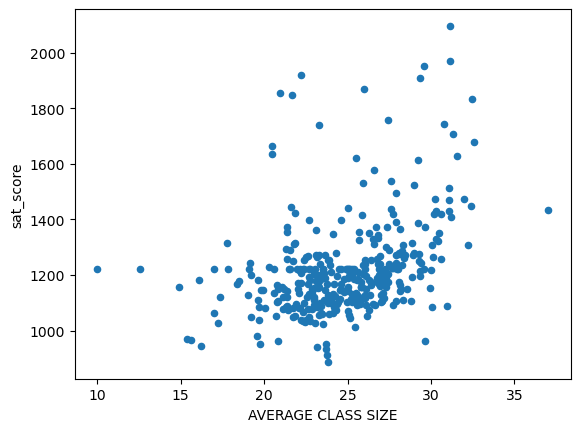

In [82]:
combined.plot.scatter(x='AVERAGE CLASS SIZE',y='sat_score')

There is only one school where the average class size exceeds 35. If we set that aside, we can generally say that larger classes tend to correlate with higher average SAT scores. However, no strong correlation has been observed.

# SAT Scores and Boroughs <a class="anchor" id="SATScoresandBoroughs"></a>

In the map below, you can see the distribution of high schools in New York City. We have used three colors to demonstrate the average SAT score of each school. The colors are as follows:
- Red for scores below 1200 (below average)
- Orange for scores between 1200 and 1600 (average)
- Green for scores above 1600 (above average)

In [83]:
import folium  
import pandas as pd  
import numpy as np  
import json  

# Assuming 'combined' DataFrame is already loaded  
# Check for missing values  
combined.dropna(subset=['lat', 'lon', 'sat_score'], inplace=True)  

# Initialize the map centered around the average location  
map_center = [combined['lat'].mean(), combined['lon'].mean()]  
m = folium.Map(location=map_center, zoom_start=10.4)  

# Function to determine color based on SAT scores  
def get_color(sat_score):  
    if sat_score < 1200:  
        return '#ff0000'  # Red for below average SAT scores  
    elif 1200 <= sat_score <= 1600:  
        return '#ffa500'  # Orange for average SAT scores  
    else:  
        return '#008000'  # Green for above average SAT scores  

# Add circle markers to the map  
for index, row in combined.iterrows():  
    folium.CircleMarker(  
        location=(row['lat'], row['lon']),  
        radius=2.7,  # Adjust the radius as needed  
        color=get_color(row['sat_score']),  # Use the color function  
        fill=True,  
        fill_color=get_color(row['sat_score']),  
        fill_opacity=0.6,  
        popup=f'SAT Score: {row["sat_score"]}'  # Popup displaying SAT scores  
    ).add_to(m)  

# Add GeoJSON layer for borough boundaries  
with open('data/Borough Boundaries.geojson') as f:  
    geojson_data = json.load(f)  

folium.GeoJson(  
    geojson_data,  
    name='Borough Boundaries',  
    style_function=lambda feature: {  
        'fillColor': '#ffffff',  
        'color': '#000000',  
        'weight': 2,  
        'fillOpacity': 0.1,  
    }  
).add_to(m)  

# Add layer control to toggle the GeoJSON layer  
folium.LayerControl().add_to(m)  

# Create a legend  
legend_html = '''  
<div style="position: fixed;   
            bottom: 50px; left: 50px; width: 220px; height: 180px;   
            border:2px solid grey; z-index:9999; font-size:14px;  
            background-color:white; opacity: 0.85; padding: 10px;">  
    <b>Legend</b> <br>  
    <i style="background: #ff0000; width: 10px; height: 10px; display: inline-block; margin-right: 5px;"></i> SAT Score < 1200 (Below Average) <br>  
    <i style="background: #ffa500; width: 10px; height: 10px; display: inline-block; margin-right: 5px;"></i> 1200 ≤ SAT Score ≤ 1600 (Average) <br>  
    <i style="background: #008000; width: 10px; height: 10px; display: inline-block; margin-right: 5px;"></i> SAT Score > 1600 (Above Average) <br>  
</div>  
'''  

m.get_root().html.add_child(folium.Element(legend_html))  

# Display the map  
m


<Axes: xlabel='boro'>

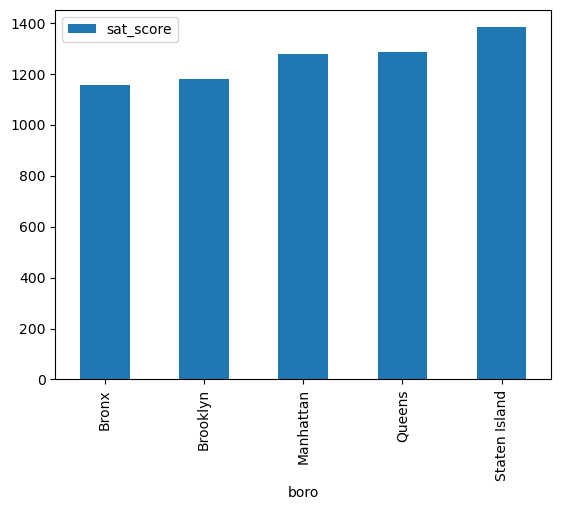

In [84]:
pivot_table = combined.pivot_table(index='boro', values='sat_score', aggfunc="mean")
pivot_table.plot.bar()

<img src='https://i.pinimg.com/736x/0a/14/d4/0a14d4e0d55633198602265d50625210.jpg'>
Source: https://cz.pinterest.com/pin/276619602097735590/

- The Bronx has the lowest average SAT scores among the boroughs. Given that a significant portion of its population is Hispanic, we can deduce that factors such as language barriers, socio-economic status, and access to educational resources significantly influence these scores. Addressing these issues requires comprehensive policy changes and targeted interventions to ensure that all students have equal opportunities to succeed.

- Brooklyn ranks just above the Bronx in terms of average SAT scores. Many areas in the eastern part of the borough have predominantly African American and Hispanic populations. This suggests that the SAT may not be an equitable assessment for these communities due to various systemic factors.

- In contrast, Staten Island has the highest average SAT scores, despite having a relatively low number of schools. The majority of its population is white, which raises concerns about potential inequities inherent in the SAT for different demographic groups.

- Following Staten Island, Queens and Manhattan, both recognized for their diversity, rank second and third, respectively, in terms of average SAT scores.

# Conclusion <a class="anchor" id="Conclusion"></a>

There are various correlations between SAT scores and different student demographics. Higher percentages of Black and Hispanic students are associated with lower SAT scores, likely due to structural issues such as disparities in funding and socio-economic challenges. Conversely, higher percentages of White and Asian students correlate with higher SAT scores, possibly influenced by socio-economic advantages and cultural emphasis on education. Additionally, schools with higher percentages of students receiving free or reduced-price lunch (FRL), English Language Learners (ELL), and special education students tend to have lower SAT scores, highlighting the need for targeted support.

Geographically, the Bronx has the lowest average SAT scores among the boroughs, influenced by factors such as language barriers and socio-economic status, particularly within its significant Hispanic population. Brooklyn, with many areas predominantly African American and Hispanic, ranks just above the Bronx, suggesting inequities in SAT assessments. In contrast, Staten Island, with a majority White population, has the highest average SAT scores, raising concerns about potential inequities in the SAT. Queens and Manhattan, known for their diversity, rank second and third, respectively.

Overall, socio-economic factors and structural inequities might play a considerable role in influencing SAT scores, suggesting the need for comprehensive policy changes and targeted interventions to ensure equal educational opportunities for all students.